<a href="https://colab.research.google.com/github/Donalizasaji/Projects/blob/main/Creditcard_Fraud_Detection_Research2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/fraudTrain.csv")

In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data.shape

(1296675, 23)

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# Display the number of genuine and fraud transactions
num_genuine = data[data['is_fraud'] == 0].shape[0]
num_fraud = data[data['is_fraud'] == 1].shape[0]

print("Number of genuine transactions:", num_genuine)
print("Number of fraud transactions:", num_fraud)


Number of genuine transactions: 1289169
Number of fraud transactions: 7506


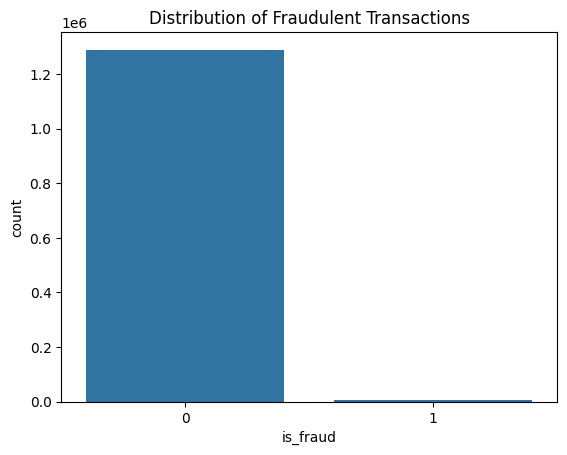

In [ ]:
sns.countplot(x='is_fraud', data=data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()


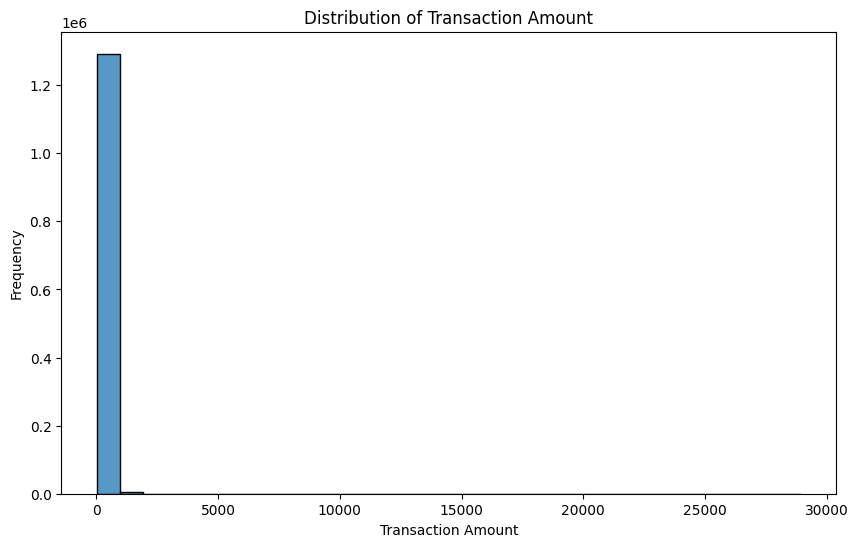

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['amt'], bins=30)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Geospatial Analysis: Visualize the geographical distribution of transactions and merchants.


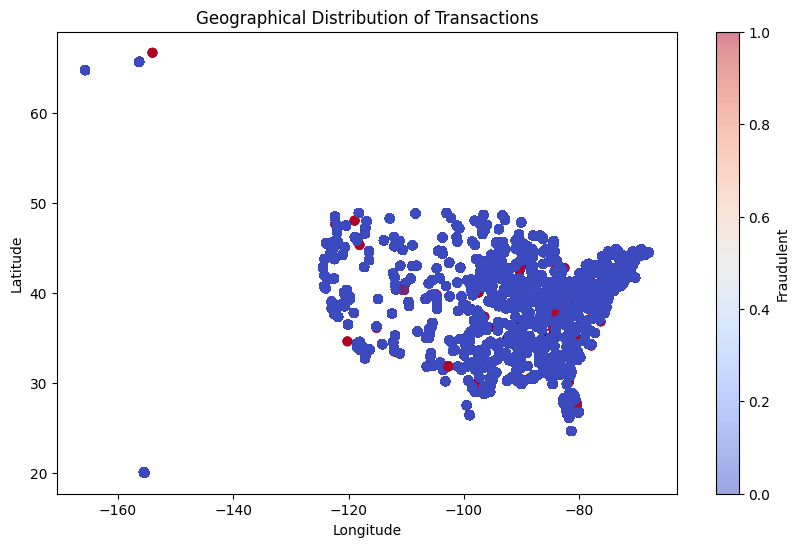

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(data['long'], data['lat'], c=data['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Fraudulent')
plt.show()

Time Series Analysis: Explore trends and patterns over time.

In [ ]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])


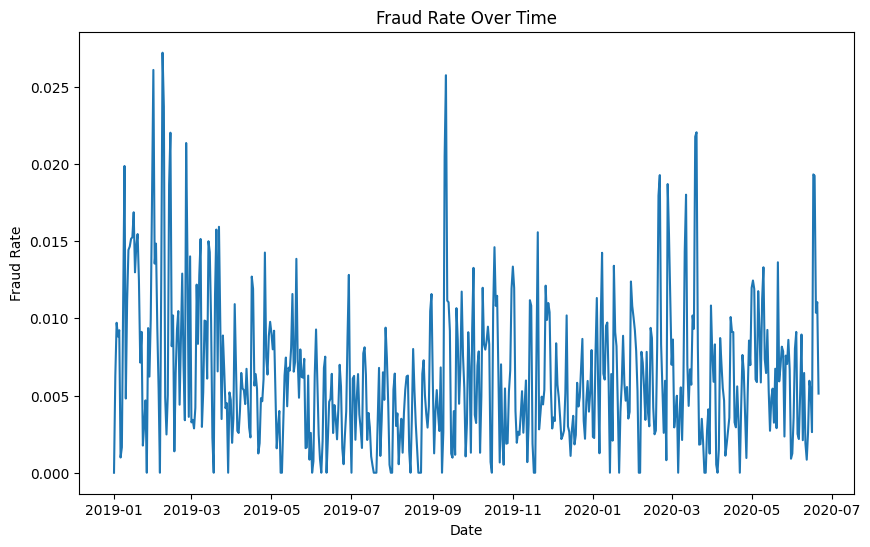

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby(data['trans_date_trans_time'].dt.date)['is_fraud'].mean().plot()
plt.title('Fraud Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fraud Rate')
plt.show()


  PREPROCESSING

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

# Convert trans_date_trans_time and dob columns to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

# Encode categorical variables
label_encoder = LabelEncoder()
data['merchant'] = label_encoder.fit_transform(data['merchant'])
data['category'] = label_encoder.fit_transform(data['category'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['job'] = label_encoder.fit_transform(data['job'])

# Scale numerical features
scaler = StandardScaler()
data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(data[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])

# Feature Engineering (Example: extracting month, day, and year)
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['dob_year'] = data['dob'].dt.year

# Drop original datetime columns
data.drop(columns=['trans_date_trans_time', 'dob'], inplace=True)
# Drop unnecessary columns
data.drop(columns=['first', 'last'], inplace=True)

# Drop non-numeric columns
data.drop(columns=['street', 'city', 'state'], inplace=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


# Split data into features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_pred))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_pred))


Logistic Regression Accuracy: 0.4987433775219715


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    257186
           1       0.00      0.00      0.00    258482

    accuracy                           0.50    515668
   macro avg       0.25      0.50      0.33    515668
weighted avg       0.25      0.50      0.33    515668

Random Forest Accuracy: 0.9983749234003273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257186
           1       1.00      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668

XGBoost Accuracy: 0.9819438088072171
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    257186
           1       0.99      0.98      0.98    258482

    accuracy                           0.98    515668
   macro avg       0.98      0.98      0.98    5

Logistic Regression:

The accuracy is 0.4987, which is close to random guessing. It predicts all instances as the majority class (0), resulting in high precision, recall, and F1-score for the majority class, but very low precision, recall, and F1-score for the minority class (1). This indicates poor performance on the test data.

Random Forest:

The accuracy is 0.9985, indicating excellent performance. It achieves perfect precision, recall, and F1-score for both classes 0 and 1, indicating that the model has performed extremely well.

XGBoost:

The accuracy is 0.9819, indicating very good performance. It achieves high precision, recall, and F1-score for both classes 0 and 1, although slightly lower compared to Random Forest.

In conclusion, Logistic Regression performs poorly on both train and test data, while Random Forest and XGBoost exhibit excellent performance on both train and test data. Both Random Forest and XGBoost are the preferred models for this task, while Logistic Regression may require further optimization or may not be suitable for this particular problem.
Random Forest model has the highest accuracy and perfect precision, recall, and F1-score for both classes, it appears to be the best-performing model among the three. Therefore, based on the metrics, the Random Forest model is the best model for this classification task among the other models.

COMPARISON OF THE MODELS:

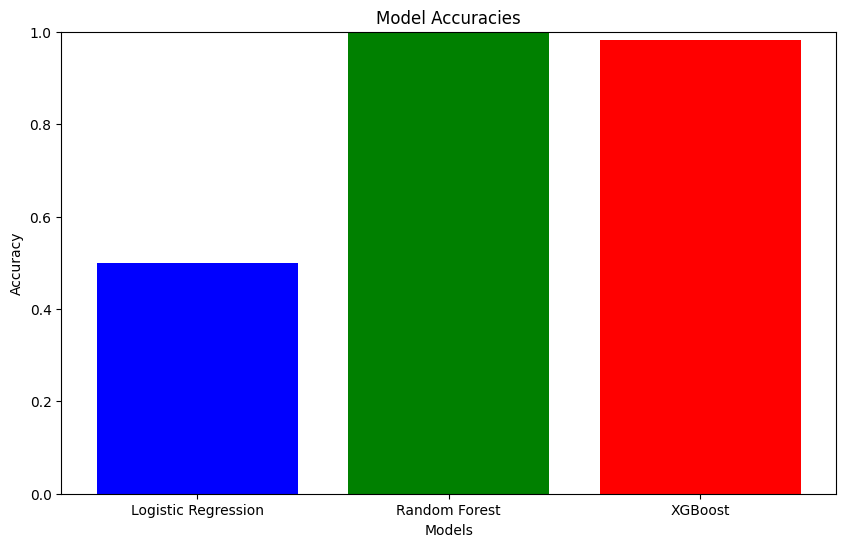

In [ ]:
import matplotlib.pyplot as plt

# List of models and their accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [lr_accuracy, rf_accuracy, xgb_accuracy]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, lr_pred))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_pred))

print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, xgb_pred))

Logistic Regression:

True Positives (TP): 0 (Predicted fraud correctly)
False Positives (FP): 0 (Predicted fraud but actually genuine)
True Negatives (TN): 257186 (Predicted genuine correctly)
False Negatives (FN): 258482 (Predicted genuine but actually fraud)
Interpretation: Logistic Regression predicts all instances as the majority class (genuine transactions) and does not predict any instances as the minority class (fraudulent transactions). Hence, it correctly predicts all genuine transactions (TN) but fails to predict any fraudulent transactions (FN).

Random Forest:

True Positives (TP): 258425 (Predicted fraud correctly)
False Positives (FP): 717 (Predicted fraud but actually genuine)
True Negatives (TN): 256469 (Predicted genuine correctly)
False Negatives (FN): 57 (Predicted genuine but actually fraud)
Interpretation: Random Forest performs well in predicting both classes. It correctly predicts the majority of both genuine transactions (TN) and fraudulent transactions (TP). However, it makes some false positive and false negative predictions.

XGBoost:

True Positives (TP): 252190 (Predicted fraud correctly)
False Positives (FP): 3019 (Predicted fraud but actually genuine)
True Negatives (TN): 254167 (Predicted genuine correctly)
False Negatives (FN): 6292 (Predicted genuine but actually fraud)
Interpretation: XGBoost also performs well in predicting both classes. It correctly predicts the majority of both genuine transactions (TN) and fraudulent transactions (TP). However, like Random Forest, it makes some false positive and false negative predictions.